In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-43.41833050474392 52.41085548998015
53.5050145187239 71.63178643169329
60.86575582486893 130.8578911570802
89.46040319123651 123.60191902338562
49.211503060717575 170.03665225485713
69.52370468164094 -18.583881476854145
12.831807935515897 171.28794583600882
13.730080234944992 -68.58932994506773
-6.581925449173539 -121.57835159333872
-81.0459207248188 -138.04583421965472
-3.810495104548181 -33.81162931345028
72.16510448056351 -74.38439841440061
-86.48309452001487 52.55820807875534
-63.01476614147045 -167.18541562876965
-34.40468404861762 -156.15886029587057
-78.25985271208067 -154.33492088092783
-51.481013906024764 -72.39410397364534
-82.72826381052629 -3.90282173158721
-58.478783533195596 170.23885734174593
-49.521895535611506 143.2725653747613
-36.59248282244428 -106.76746452475295
-39.70868855445497 127.41062020154584
63.25231729907537 -29.995779796054137
81.45828485921402 -110.75206407196771
62.32927876604231 31.925116998525112
82.69012316360067 -50.38274792434373
-16.4030653095757

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)
    

754

In [7]:
import requests 

from config import weather_api_key

In [8]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library

import time

from datetime import datetime

In [10]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval       ")
print("-------------------------------")


# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in our list.

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count. 
    
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the datge to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping ...")
        pass
    
# Indicate that Data Loading is complete

print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")
        


Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping ...
Processing Record 2 of Set 1 | poltavka
Processing Record 3 of Set 1 | mayya
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping ...
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | westpunt
City not found. Skipping ...
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | avera
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | 

Processing Record 36 of Set 4 | hortolandia
Processing Record 37 of Set 4 | bayir
Processing Record 38 of Set 4 | la asuncion
Processing Record 39 of Set 4 | los llanos de aridane
Processing Record 40 of Set 4 | victoria
Processing Record 41 of Set 4 | odweyne
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | lakes entrance
Processing Record 45 of Set 4 | knysna
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | alta floresta
Processing Record 48 of Set 4 | sinnamary
Processing Record 49 of Set 4 | severo-kurilsk
Processing Record 50 of Set 4 | mendahara
City not found. Skipping ...
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | san cristobal
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | norfolk
Processing Record 5 of Set 5 | tungkang
City not found. Skipping ...
Processing Record 6 of Set 5 | orangeburg
Processing Record 7 of Set 5 | antofagasta
Processing

Processing Record 22 of Set 8 | bubaque
Processing Record 23 of Set 8 | ginir
Processing Record 24 of Set 8 | salto
Processing Record 25 of Set 8 | kutoarjo
Processing Record 26 of Set 8 | gaogou
Processing Record 27 of Set 8 | flinders
Processing Record 28 of Set 8 | diofior
Processing Record 29 of Set 8 | san borja
Processing Record 30 of Set 8 | naryan-mar
Processing Record 31 of Set 8 | padang
Processing Record 32 of Set 8 | wanning
Processing Record 33 of Set 8 | colares
Processing Record 34 of Set 8 | itabera
Processing Record 35 of Set 8 | ilam
Processing Record 36 of Set 8 | trinidad
Processing Record 37 of Set 8 | thunder bay
Processing Record 38 of Set 8 | fort nelson
Processing Record 39 of Set 8 | broome
Processing Record 40 of Set 8 | ikalamavony
Processing Record 41 of Set 8 | kushima
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | chimoio
Processing Record 44 of Set 8 | poum
Processing Record 45 of Set 8 | tubruq
City not found. Skipping ...
Proces

Processing Record 8 of Set 12 | piacabucu
Processing Record 9 of Set 12 | omboue
Processing Record 10 of Set 12 | kumluca
Processing Record 11 of Set 12 | oistins
Processing Record 12 of Set 12 | banfora
Processing Record 13 of Set 12 | mangualde
Processing Record 14 of Set 12 | cabinda
Processing Record 15 of Set 12 | saint-denis
Processing Record 16 of Set 12 | waycross
Processing Record 17 of Set 12 | afua
Processing Record 18 of Set 12 | novyy urengoy
Processing Record 19 of Set 12 | nanortalik
Processing Record 20 of Set 12 | bismarck
Processing Record 21 of Set 12 | nampa
Processing Record 22 of Set 12 | marapanim
Processing Record 23 of Set 12 | fallon
Processing Record 24 of Set 12 | gura teghii
Processing Record 25 of Set 12 | cabedelo
Processing Record 26 of Set 12 | ussel
Processing Record 27 of Set 12 | lavrentiya
Processing Record 28 of Set 12 | peruibe
Processing Record 29 of Set 12 | havoysund
Processing Record 30 of Set 12 | bhimunipatnam
Processing Record 31 of Set 12 

City not found. Skipping ...
Processing Record 44 of Set 15 | chifeng
Processing Record 45 of Set 15 | okhotsk
Processing Record 46 of Set 15 | port said
Processing Record 47 of Set 15 | zabaykalsk
Processing Record 48 of Set 15 | bima
Processing Record 49 of Set 15 | byron bay
Processing Record 50 of Set 15 | brunswick
Processing Record 1 of Set 16 | hualmay
Processing Record 2 of Set 16 | marovoay
Processing Record 3 of Set 16 | chumikan
Processing Record 4 of Set 16 | goias
------------------------------
Data Retrieval Complete       
------------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Poltavka,54.3663,71.7632,29.07,77,53,6.98,RU,2022-09-29 16:19:34
1,Mayya,61.7333,130.2811,29.52,92,46,2.98,RU,2022-09-29 16:19:34
2,Tiksi,71.6872,128.8694,18.91,93,99,5.66,RU,2022-09-29 16:19:36
3,Nikolskoye,59.7035,30.7861,46.80,93,100,4.90,RU,2022-09-29 16:19:37
4,Butaritari,3.0707,172.7902,82.38,74,97,18.30,KI,2022-09-29 16:19:39


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Poltavka,RU,2022-09-29 16:19:34,54.3663,71.7632,29.07,77,53,6.98
1,Mayya,RU,2022-09-29 16:19:34,61.7333,130.2811,29.52,92,46,2.98
2,Tiksi,RU,2022-09-29 16:19:36,71.6872,128.8694,18.91,93,99,5.66
3,Nikolskoye,RU,2022-09-29 16:19:37,59.7035,30.7861,46.80,93,100,4.90
4,Butaritari,KI,2022-09-29 16:19:39,3.0707,172.7902,82.38,74,97,18.30


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting 

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


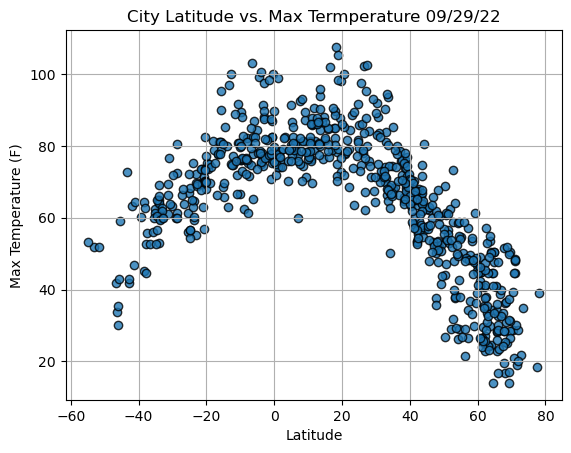

In [16]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Max Termperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show plot

plt.show()


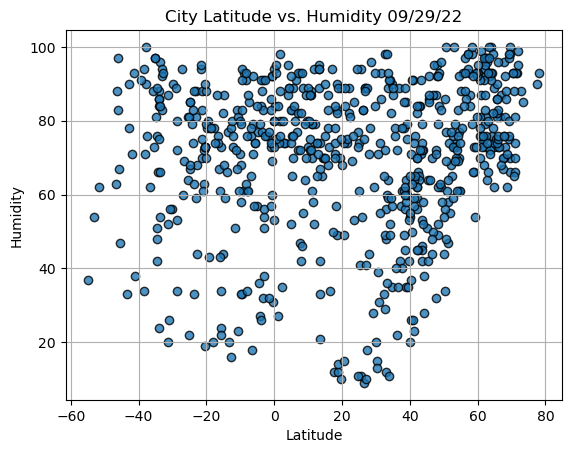

In [19]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show plot

plt.show()



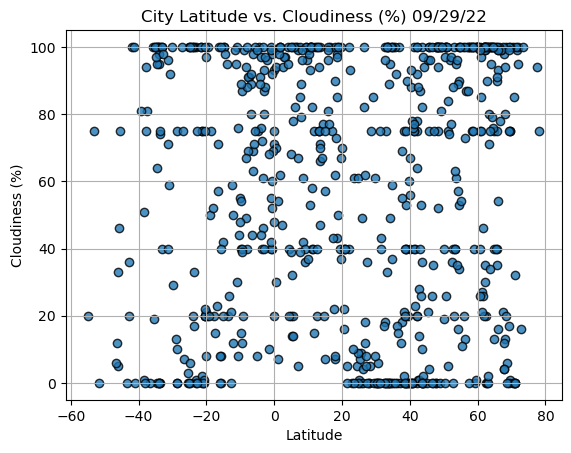

In [22]:
# Build the scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot

plt.show()



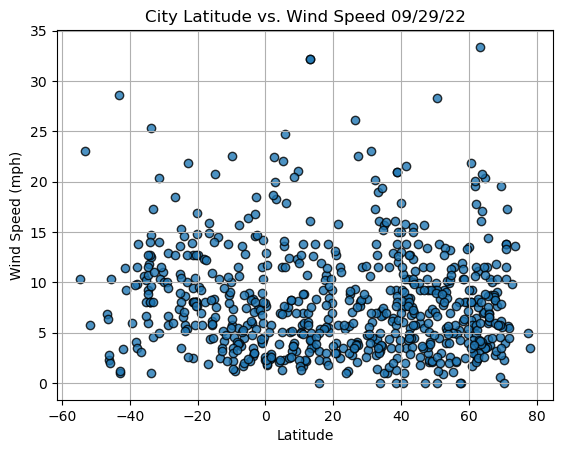

In [23]:
# Build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot

plt.show()
